# VIZBI Tutorial Session
### Part 2: Cytoscape, IPython, Docker, and reproducible network data visualization workflows

Tuesday, 3/24/2015


### Lesson 2: Working with Graph Libraries

by [Keiichiro Ono](http://keiono.github.io/)

----

![](http://cl.ly/XohP/logo300.png) 

![](http://igraph.org/img/igraph3.svg)


## Background 
Cytoscape is an all-in-one package for network data integration, analysys, and visualization.  However, there are several powerful graph abnalysis tools designed for advanced users.  They usually have command-line interface and are not easy to use for interactive data visualization.  __By using cyREST, you can access the best of the two worlds!__

### Cytoscape vs Other Graph Libraries

#### Cytoscape

![](http://www.cytoscape.org/images/logo/cy3logoOrange.svg)

##### Pros
* Easy-to-use GUI
* All-in-one
* Advanced visualization features

##### Cons
* GUI operation...
    * Not easy to integrate it into automated workflows
* Scalability
    * Designed to run on workstations

#### Command-Line Graph Analysis Tools

![](http://igraph.org/img/igraph3.svg)

##### Pros
* Lots of graph analysis algorithms
* High performance
    * Not always true, but some of them use C/C++ modules for optimization

##### Cons
* Limited visualization features
* Hard to use for people with limited computing literacy

## Use Cytoscape as an external visualization engine
In this section, you will learn the following:

* Load network data sets to NetworkX graph object
* Calculate basic statistics of the graph
* Visualize it in Cytoscape

----

## Overview of Popular Graph Libraries

### NetworkX
### igraph
### Graph-Tool


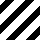
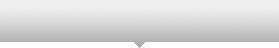
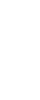
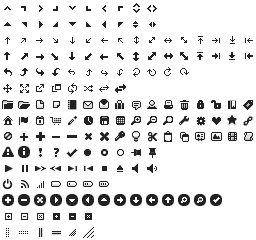
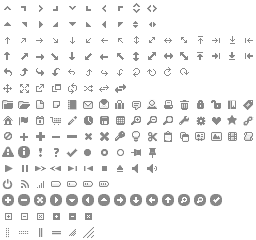
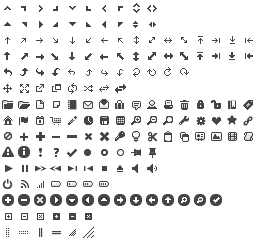
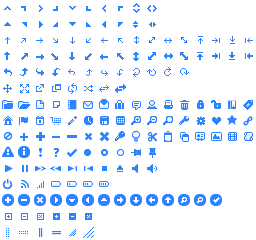
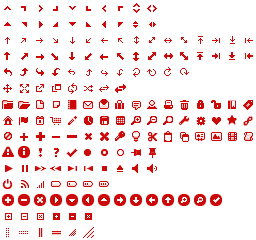
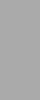
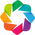
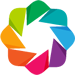
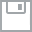
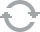
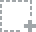
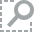
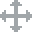
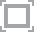
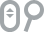

In [1]:
import requests
import json
import networkx as nx
from IPython.display import Image

from py2cytoscape import util as cy 

from collections import OrderedDict
import numpy as np
from bokeh.charts import Bar
from bokeh.plotting import *

import matplotlib.pyplot as plt
%matplotlib inline

output_notebook()

import pandas as pd

PORT_NUMBER = 1234
IP = '10.0.1.6'
BASE = 'http://' + IP +  ':' + str(PORT_NUMBER) + '/v1/'
HEADERS = {'Content-Type': 'application/json'}

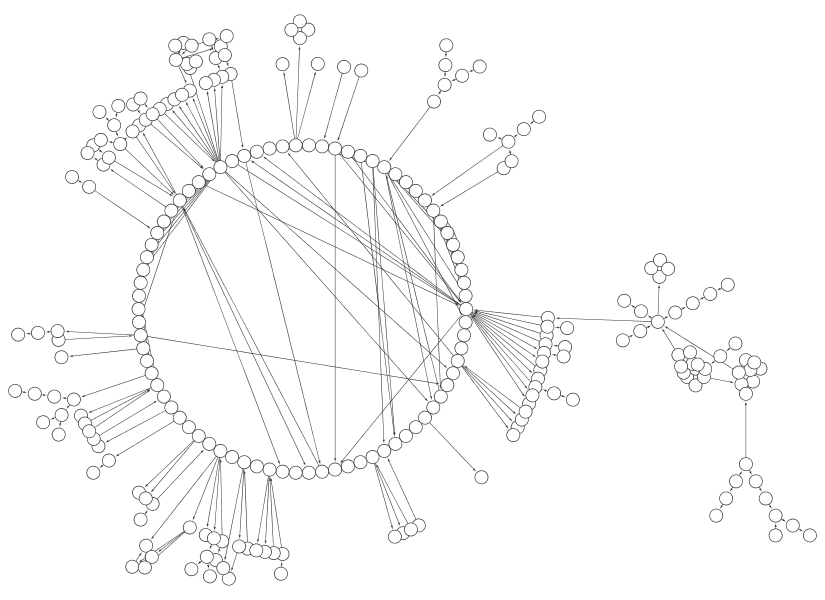

In [2]:
# Create dictionary object from JSON file
f = open('data/yeast.json', 'r')
cyjs_network = json.load(f)

# Set network name
cyjs_network['data']['name'] = 'Yeast Sample 1' 

res = requests.post(BASE + 'networks', data=json.dumps(cyjs_network), headers=HEADERS)
new_suid = res.json()['networkSUID']
Image(BASE+'networks/' + str(new_suid) + '/views/first.png')

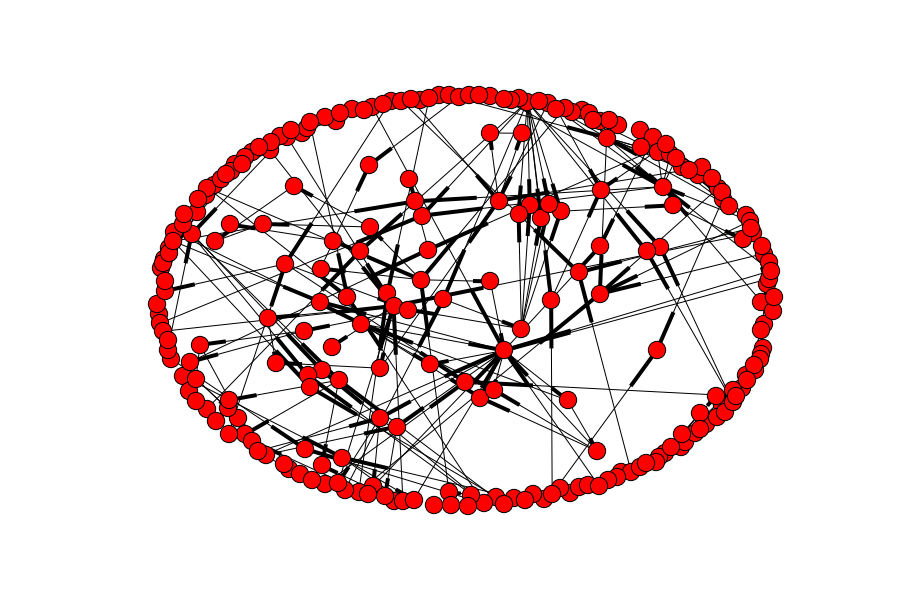

In [68]:
nx_network = cy.to_networkx(cyjs_network)
undirected = nx_network.to_undirected()
clqs = nx.find_cliques(undirected)

plt.figure(figsize=(12,8));

c_size = [len(cl) for cl in clqs]

nx.draw_spring(nx_network)

## Working with large graph

## Coloring based on GO


In [45]:
df1 = pd.read_csv('http://www.ebi.ac.uk/Tools/webservices/psicquic/intact/webservices/current/search/query/brca*?format=tab27', 
                  delimiter='\t', header=None)

In [50]:

human_net_source = 'http://www.functionalnet.org/humannet/HumanNet.v1.benchmark.txt'
df2 = pd.read_csv(human_net_source, delimiter='\t', header=None)
df2.head()

,0,1
0,100,10005
1,100,10288
2,100,103
3,100,10537
4,100,10538


In [ ]:
res = requests.get(human_net_source)

In [66]:
list1 = res.text.split('\n')
print(len(list1))
nx_human = nx.parse_edgelist(list1)
len(nx_human.nodes())

cyjs_human = cy.from_networkx(nx_human)

270705


In [71]:
cl2 = nx.find_cliques(nx_human)
cls2 = [c for c in cl2]

In [74]:
clsize1 = [len(c) for c in cls2]
max(clsize1)

197

In [67]:
res = requests.post(BASE + 'networks?title=human-net', data=json.dumps(cyjs_human), headers=HEADERS)
new_suid = res.json()['networkSUID']

In [55]:
edge_list = df2[[0,1]]
edgelist_str = edge_list.to_csv(sep='\t', header=None, index=None)

res = requests.post(BASE + 'networks?format=edgelist&title=human-net', data=edgelist_str, headers=HEADERS)
new_suid = res.json()['networkSUID']

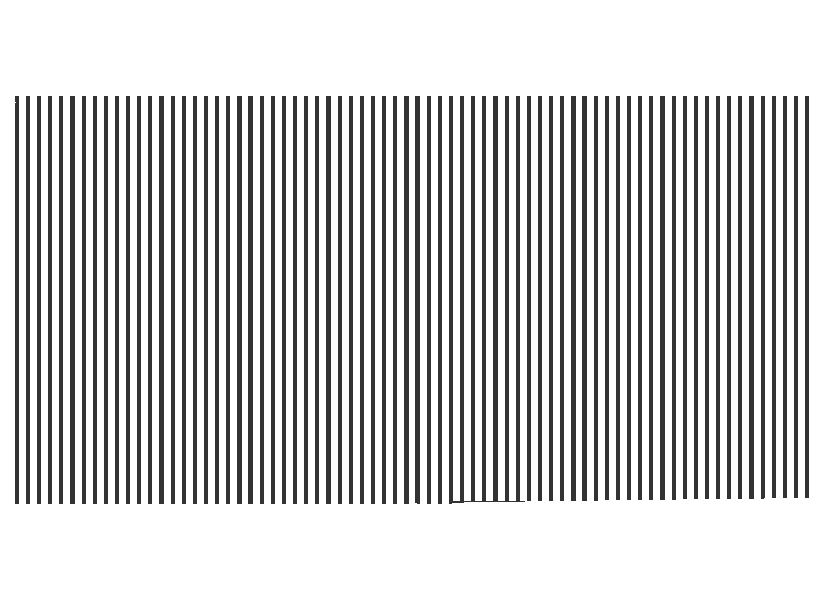

In [54]:
requests.get(BASE + 'apply/layouts/circular/' + str(new_suid))
Image(BASE+'networks/' + str(new_suid) + '/views/first.png')

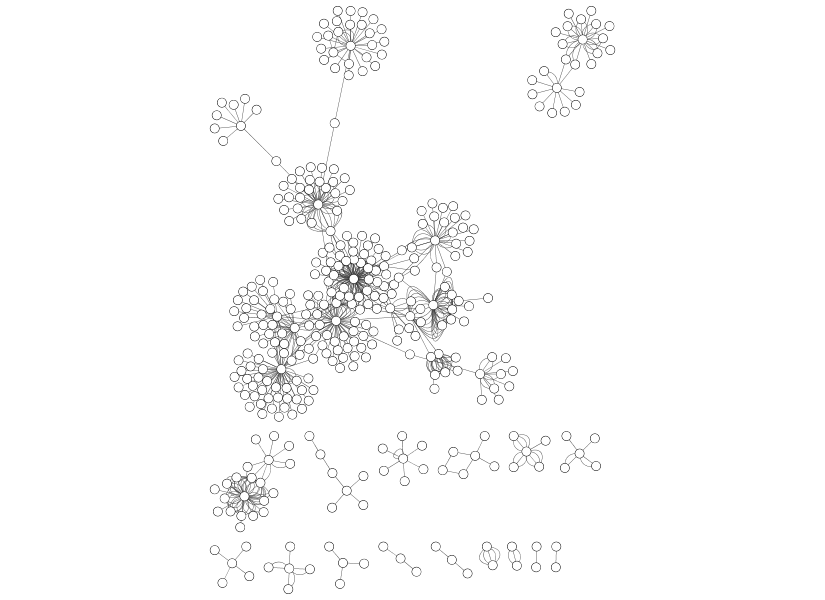

In [46]:
df1.head()
edge_list = df1[[0,1]]
edge_list.head()
edgelist_str = edge_list.to_csv(sep='\t', header=None, index=None)

res = requests.post(BASE + 'networks?format=edgelist', data=edgelist_str, headers=HEADERS)
new_suid = res.json()['networkSUID']

requests.get(BASE + 'apply/layouts/force-directed/' + str(new_suid))
Image(BASE+'networks/' + str(new_suid) + '/views/first.png')
